# Building A Prediction model to predict stock price of Apple.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#get_ipython().run_line_magic('matplotlib', 'inline')
#%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

import tensorflow as tsrf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the data
df = pd.read_csv('HistoricalData_1641407819284.csv')

In [3]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/04/2022,$179.7,99310440,$182.63,$182.94,$179.12
1,01/03/2022,$182.01,104701200,$177.83,$182.88,$177.71
2,12/31/2021,$177.57,64062260,$178.085,$179.23,$177.26
3,12/30/2021,$178.2,59773010,$179.47,$180.57,$178.09
4,12/29/2021,$179.38,62348930,$179.33,$180.63,$178.14


# Data Manipulation

In [4]:
# Keep only the necessary columns

df = df[['Date', 'Close/Last']]
df.head()

,Date,Close/Last
0,01/04/2022,$179.7
1,01/03/2022,$182.01
2,12/31/2021,$177.57
3,12/30/2021,$178.2
4,12/29/2021,$179.38


In [5]:
# Convert the closing price to a float and the date to a datetime
df = df.replace({'\$':''}, regex = True)
df = df.astype({"Close/Last": float})
df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes

Date          datetime64[ns]
Close/Last           float64
dtype: object

In [6]:
# Set the date as the index
df.index = df['Date']
df

,Date,Close/Last
Date,,
2022-01-04,2022-01-04,179.70
2022-01-03,2022-01-03,182.01
2021-12-31,2021-12-31,177.57
2021-12-30,2021-12-30,178.20
2021-12-29,2021-12-29,179.38
...,...,...
2021-01-11,2021-01-11,128.98
2021-01-08,2021-01-08,132.05
2021-01-07,2021-01-07,130.92


# Data Visualization

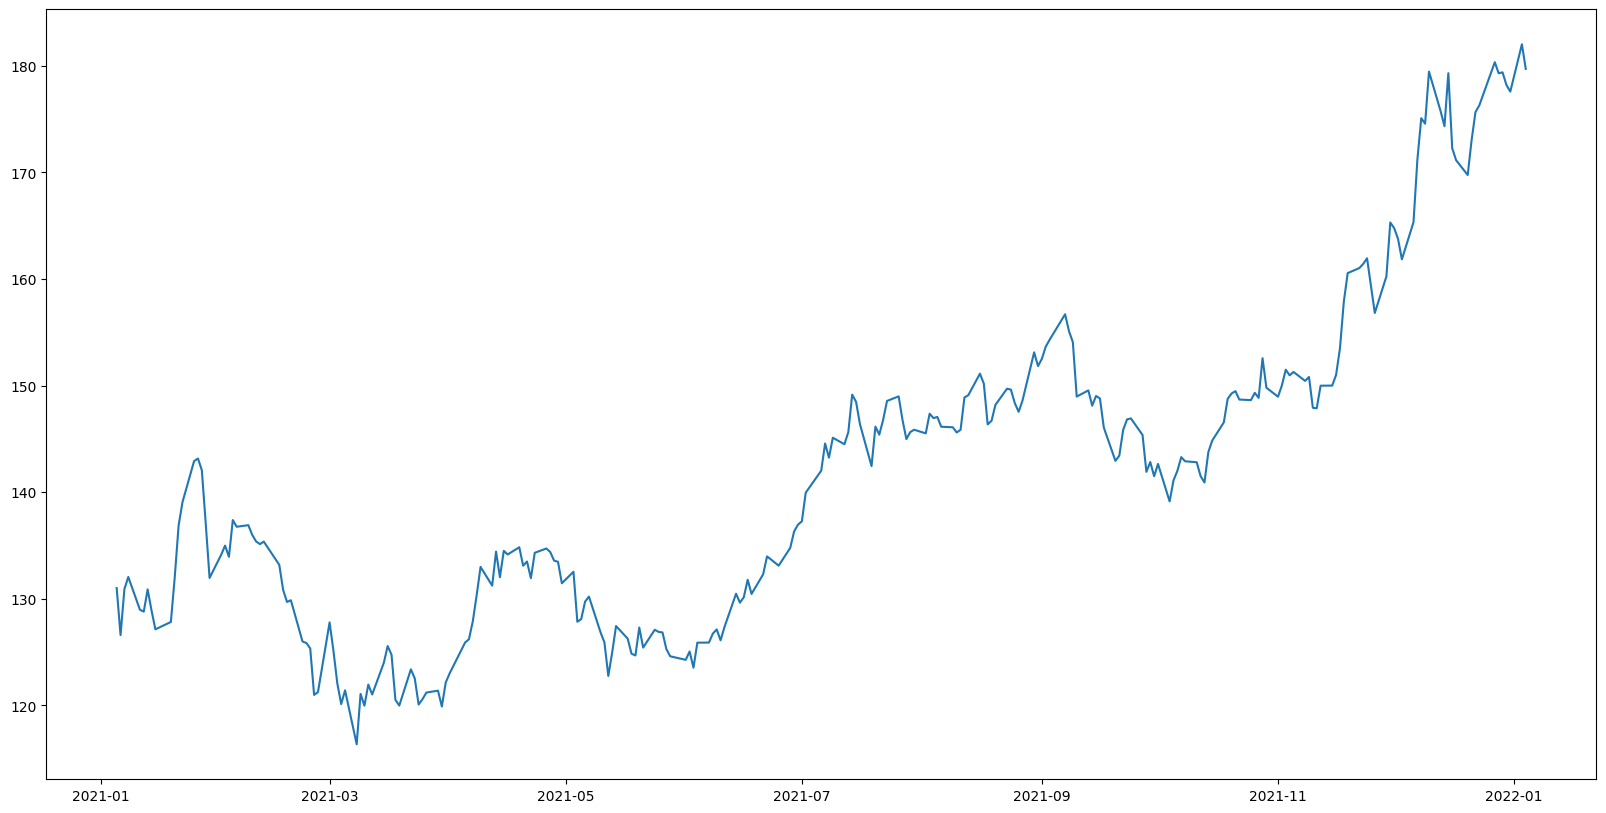

In [7]:
plt.plot(df["Close/Last"],label='Close Price history')

# Data Preparation

In [8]:
# Sort the data by date
df = df.sort_index(ascending=True,axis=0)

# Create a new dataframe with only the date and closing price columns
data = pd.DataFrame(index=range(0,len(df)-1),columns=['Date','Close/Last'])
for i in range(0,len(data)):
    data['Date'][i]=df['Date'][i]
    data['Close/Last'][i]=df['Close/Last'][i]
data.head()

,Date,Close/Last
0,2021-01-05 00:00:00,131.01
1,2021-01-06 00:00:00,126.6
2,2021-01-07 00:00:00,130.92
3,2021-01-08 00:00:00,132.05
4,2021-01-11 00:00:00,128.98


## Min-Max Scaler

In [12]:
# Split the data into training and validation sets
train_data = data[:200]
valid_data = data[200:]

# Normalize the data using a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
final_data = scaler.fit_transform(df[['Close/Last']])

# Create the training and validation sets
x_train_data, y_train_data = [], []
for i in range(60, len(train_data)):
    x_train_data.append(final_data[i-60:i,0])
    y_train_data.append(final_data[i,0])
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))


In [13]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and fit the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data, y_train_data, epochs=100, batch_size=64)

2023-01-22 23:46:49.315030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
3/3 [==============================] - 3s 46ms/step - loss: 0.1156
Epoch 2/100
3/3 [==============================] - 0s 47ms/step - loss: 0.0444
Epoch 3/100
3/3 [==============================] - 0s 48ms/step - loss: 0.0088
Epoch 4/100
3/3 [==============================] - 0s 51ms/step - loss: 0.0163
Epoch 5/100
3/3 [==============================] - 0s 101ms/step - loss: 0.0065
Epoch 6/100
3/3 [==============================] - 0s 102ms/step - loss: 0.0060
Epoch 7/100
3/3 [==============================] - 0s 61ms/step - loss: 0.0080
Epoch 8/100
3/3 [==============================] - 0s 55ms/step - loss: 0.0074
Epoch 9/100
3/3 [==============================] - 0s 45ms/step - loss: 0.0053
Epoch 10/100
3/3 [==============================] - 0s 47ms/step - loss: 0.0046
Epoch 11/100
3/3 [==============================] - 0s 50ms/step - loss: 0.0053
Epoch 12/100
3/3 [==============================] - 0s 48ms/step - loss: 0.0051
Epoch 13/100
3/3 [=============================

# Train and Test Data

In [14]:
#Get the predicted closing prices
inputs = data['Close/Last'][200:].to_numpy()
inputs = np.reshape(inputs,(-1, 1))
inputs = scaler.transform(inputs)
X_test = inputs.reshape(inputs.shape[0],1)

/Users/dagimdesta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 [==============================] - 1s 2ms/step


# Predicted Function

In [16]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

2/2 [==============================] - 0s 2ms/step


# Prediction Result

/var/folders/15/d732tg3n1mv7gj3hwz_8sn600000gn/T/ipykernel_23273/2337597430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = closing_price


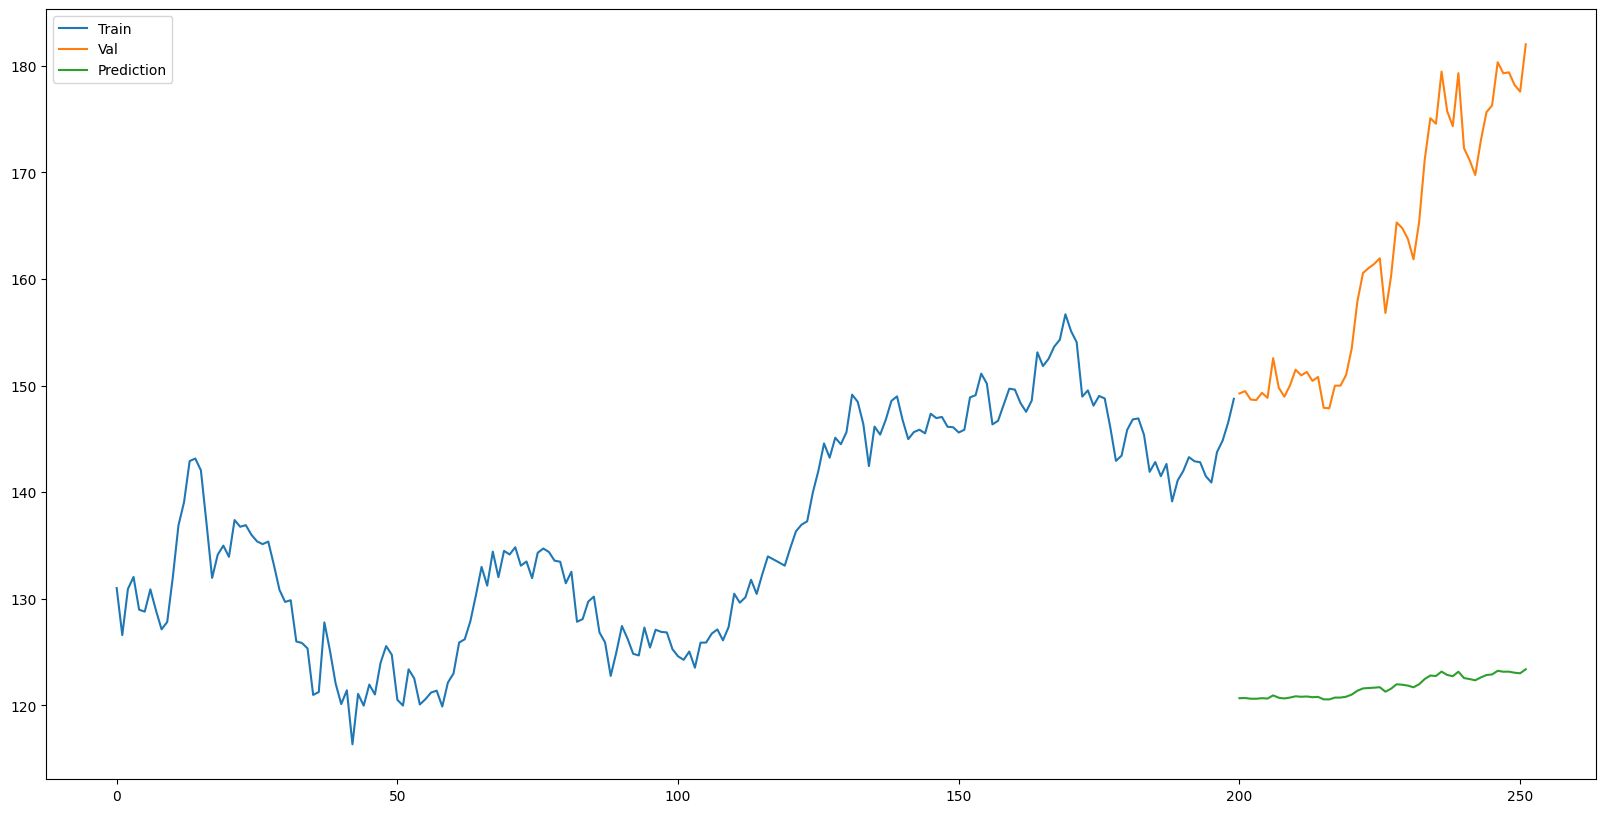

In [17]:
# Plot the results
valid_data['Predictions'] = closing_price
plt.plot(train_data['Close/Last'])
plt.plot(valid_data[['Close/Last','Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc='upper left')
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Calculate the MAE and MSE
mae = mean_absolute_error(valid_data['Close/Last'], valid_data['Predictions'])
mse = mean_squared_error(valid_data['Close/Last'], valid_data['Predictions'])

print("MAE: ", mae)
print("MSE: ", mse)

MAE:  40.48699962909404
MSE:  1753.8734632365902


# EXTRA

In [24]:
print("Shape of x_train_data: ", np.shape(x_train_data))
print("Shape of y_train_data: ", np.shape(y_train_data))

#Reshape the data for input into the LSTM
x_train_data = np.array(x_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0],x_train_data.shape[1],1))

#Compile and fit the LSTM
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=100, batch_size=64)


Shape of x_train_data:  (140, 60, 1)
Shape of y_train_data:  (140,)


NameError: name 'lstm_model' is not defined

In [25]:
lstm_model.summary()

NameError: name 'lstm_model' is not defined